In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(size=100)

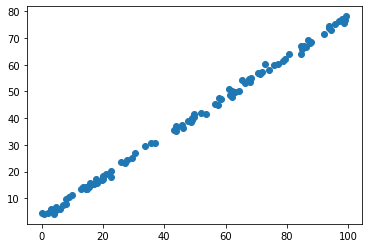

In [2]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

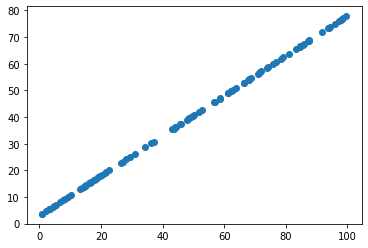

In [4]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show()

# 在digits上的降噪效果

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
digits = datasets.load_digits()

In [7]:
X = digits.data
y = digits.target

In [8]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [10]:
example_digits = noisy_digits[y==0, :][:10]  # 取数字零的前十个samples
for i in range(1, 10):
    x_num = noisy_digits[y==i][:10]
    example_digits = np.vstack([example_digits, x_num])
example_digits.shape

(100, 64)

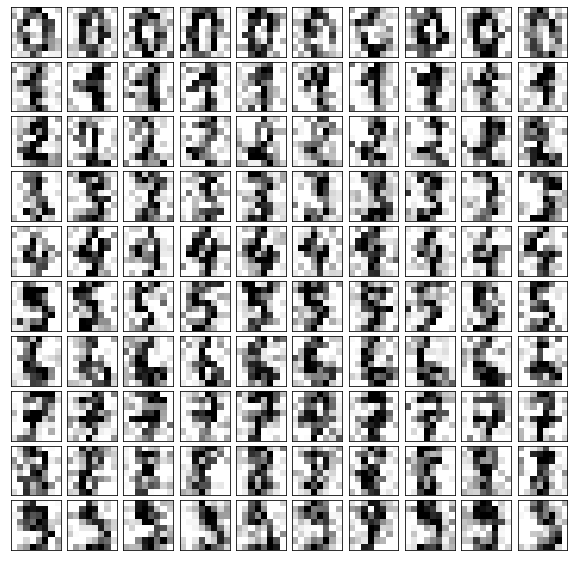

In [11]:
# 一个图中绘制10个图
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
    plt.show()
    
plot_digits(example_digits)

In [12]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [18]:
pca.components_.shape

(12, 64)

In [16]:
components = pca.transform(example_digits)
components.shape


(100, 12)

In [ ]:
filtered_digits = pca.inverse_transform(components)   # ????? 为啥逆向回去就是降噪之后的了呢
plot_digits(filtered_digits)